# Detrending of a Time Series

(Sourced from: https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

Detrending a time series means to remove the trend component from a time series.

Approaches:

- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
- Subtract the trend component obtained from time series decomposition.
- Subtract the mean
- Apply a filter like Baxter-King filter(`statsmodels.tsa.filters.bkfilter`) or the Hodrick-Prescott Filter (`statsmodels.tsa.filters.hpfilter`) to remove the moving average trend lines or the cyclical components.


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Subtracting the line of best fit

Use `scipy.signal.detrend`.

In [2]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [3]:
# detrend by subtracting line of best fit
detrended_series = signal.detrend(df.loc[:, "value"].values)
detrended_series

array([ 2.30256538,  1.86356091,  1.84158643,  2.10706396,  1.96862549,
        2.61582302,  3.30448254,  0.93736307,  1.0153496 ,  1.14101413,
        0.97050765,  1.02014818,  1.39417153,  1.12179233,  1.24691349,
        1.30089771,  1.66963374,  3.00034752,  3.28856156,  0.45404639,
        0.68219179,  0.55088336,  0.6286749 ,  0.67965865,  0.85223256,
        1.00554712,  0.95872012,  0.92460491,  1.2572906 ,  3.25010688,
        2.70831328, -0.27518669,  0.18430683, -0.22773248,  0.14426721,
        0.15593292,  0.1696199 ,  0.67431357,  0.43485926,  0.43875125,
        0.81753764,  1.15508449,  1.60667035, -1.02005059, -0.38007295,
       -0.59968198, -0.32127717, -0.43854872, -0.44589873,  0.05933252,
       -0.39852024,  0.13273951,  0.01261465,  1.24743526,  2.06698498,
       -1.28597576, -1.18651941, -0.94525427, -0.52538903, -1.03982866,
       -0.33544464, -0.61502912, -0.54142718, -0.273578  , -0.5464336 ,
        1.31812087,  1.1423502 , -2.19750691, -1.8544263 , -1.44

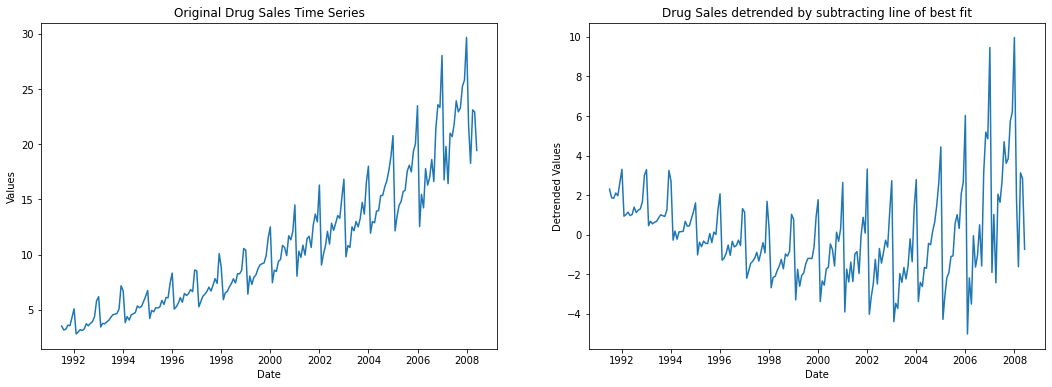

In [4]:
# plot original next to detrended time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].set_title("Original Drug Sales Time Series")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Values')
axes[0].plot(df.index, df.loc[:, "value"])

axes[1].set_title("Drug Sales detrended by subtracting line of best fit")
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Detrended Values')
axes[1].plot(df.index, detrended_series)

plt.show()

## Subtracting the trend component

Use `statsmodels.tsa.seasonal.seasonal_decompose`.

In [5]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [6]:
# detrend by subtracting trend component
multi_decomp = seasonal_decompose(df.loc[:, "value"], model="multiplicative", extrapolate_trend="freq")
detrended_series = df.loc[:, "value"] - multi_decomp.trend
detrended_series

date
1991-07-01    0.466506
1991-08-01    0.056126
1991-09-01    0.062776
1991-10-01    0.356878
1991-11-01    0.247064
                ...   
2008-02-01   -2.383114
2008-03-01   -6.033513
2008-04-01   -1.451839
2008-05-01   -1.908064
2008-06-01   -5.649893
Name: value, Length: 204, dtype: float64

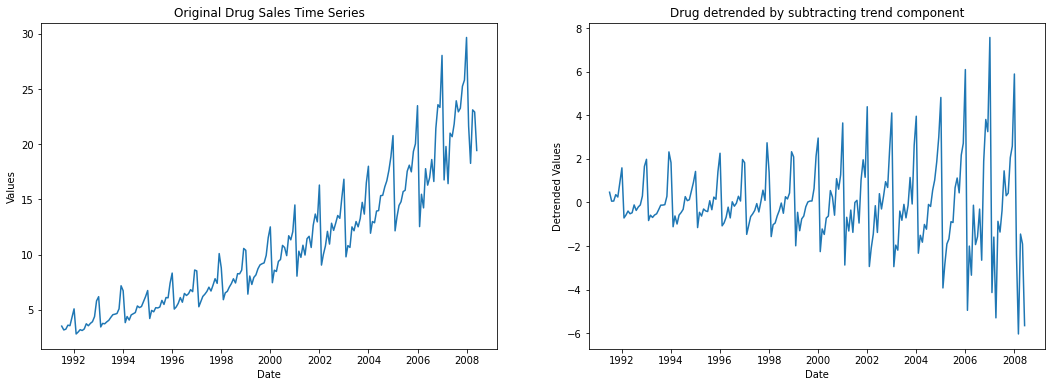

In [7]:
# plot original next to detrended time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].set_title("Original Drug Sales Time Series")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Values')
axes[0].plot(df.index, df.loc[:, "value"])

axes[1].set_title("Drug detrended by subtracting trend component")
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Detrended Values')
axes[1].plot(df.index, detrended_series)

plt.show()

## Subtract the mean

In [8]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [9]:
# detrend by subtracting mean
series_mean = df.loc[:, "value"].mean()
detrended_series = df.loc[:, "value"] - series_mean
detrended_series

date
1991-07-01    -7.167839
1991-08-01    -7.513539
1991-09-01    -7.442209
1991-10-01    -7.083427
1991-11-01    -7.128561
                ...    
2008-02-01    10.959855
2008-03-01     7.570515
2008-04-01    12.413247
2008-05-01    12.218080
2008-06-01     8.737310
Name: value, Length: 204, dtype: float64

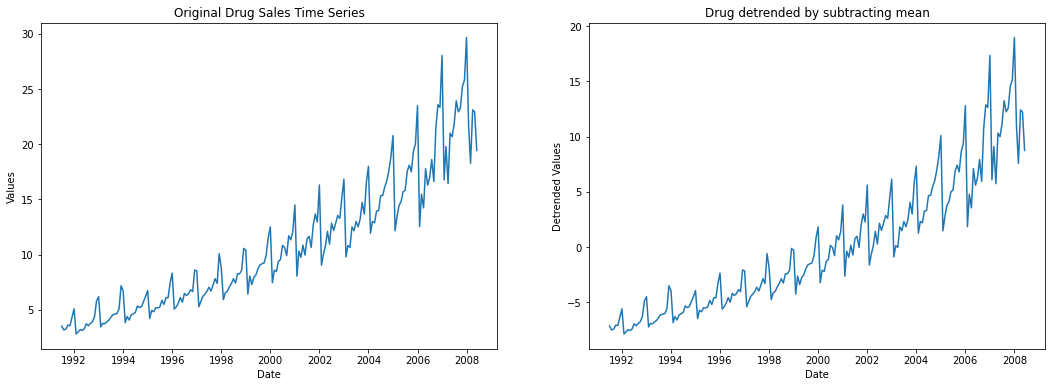

In [10]:
# plot original next to detrended time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].set_title("Original Drug Sales Time Series")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Values')
axes[0].plot(df.index, df.loc[:, "value"])

axes[1].set_title("Drug detrended by subtracting mean")
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Detrended Values')
axes[1].plot(df.index, detrended_series)

plt.show()